In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('C:/Users/jxjsj/Desktop/JupyterHome/Data/QuantOutPut/SingleFactorICSeriesROIC.csv',index_col=0)
# df['IC_'] = df['IC'].shift(1)
# df = df.dropna()
save_df = df.copy()

In [8]:
IC_mean = save_df['IC'].mean()
IC_std = save_df['IC'].std()
IR_mean = save_df['IR'].mean()
IR_std = save_df['IR'].std()
Rank_IC_mean = save_df['Rank_IC'].mean()
Rank_IC_std = save_df['Rank_IC'].std()
IC_isPositive = sum([1 if i>0 else 0 for i in save_df['IC'].tolist()])/len(save_df['IC'])
IC_bigger005 = sum([1 if abs(i)>0.05 else 0 for i in save_df['IC'].tolist()])/len(save_df['IC'])
IC_Posbigger005 = sum([1 if abs(i)>0.05 and i >0 else 0 for i in save_df['IC'].tolist()])/sum([1 if i >0 else 0 for i in save_df['IC'].tolist()])
IC_Negbigger005 = sum([1 if abs(i)>0.05 and i <0 else 0 for i in save_df['IC'].tolist()])/sum([1 if i <0 else 0 for i in save_df['IC'].tolist()])
Long_mean = save_df['Long'].mean()
Long_std = save_df['Long'].std()
Short_mean = save_df['Short'].mean()
Short_std = save_df['Short'].std()

In [9]:
print(IC_mean,
IC_std,
IR_mean,
IR_std,
Rank_IC_mean,
Rank_IC_std,
IC_isPositive,
IC_bigger005,
IC_Posbigger005,
IC_Negbigger005,
Long_mean,
Long_std,
Short_mean,
Short_std,)

0.040279709343441876 0.1768709801661283 0.27734435778604744 0.6709807821524785 0.038120956434728084 0.1976080500219964 0.5900621118012422 0.8012422360248447 0.8526315789473684 0.7272727272727273 0.021553958558051967 0.0930759725463208 0.011115529666464818 0.10705162634284209


In [16]:
X = df['IC_'].values
y = df['IC'].values
X = sm.add_constant(X)

est = sm.OLS(y,X)
result = est.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.239
Date:                Tue, 28 May 2019   Prob (F-statistic):              0.268
Time:                        00:36:21   Log-Likelihood:                 48.379
No. Observations:                 145   AIC:                            -92.76
Df Residuals:                     143   BIC:                            -86.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0377      0.015      2.540      0.0

(array([ 3.,  1.,  7.,  9.,  8., 15., 17., 20., 16., 17., 12.,  9.,  7.,
         3.,  1.]),
 array([-0.3986295 , -0.34069616, -0.28276283, -0.22482949, -0.16689615,
        -0.10896281, -0.05102947,  0.00690387,  0.06483721,  0.12277054,
         0.18070388,  0.23863722,  0.29657056,  0.3545039 ,  0.41243724,
         0.47037058]),
 <a list of 15 Patch objects>)

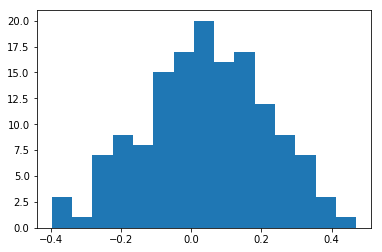

In [20]:
plt.hist(df['IC'],15)